In [0]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
from PIL import Image

import math
import copy

from google.colab import drive
drive.mount('/content/drive')

class MLP(nn.Module):
  def __init__(self, n_units, init_scale=1.0):
    super(MLP, self).__init__()

    self._n_units = copy.copy(n_units)
    self._layers = []
    for i in range(1, len(n_units)):
      layer = nn.Linear(n_units[i-1], n_units[i], bias=False)
      variance = math.sqrt(2.0 / (n_units[i-1] + n_units[i]))
      layer.weight.data.normal_(0.0, init_scale * variance)
      self._layers.append(layer)

      name = 'fc%d' % i
      if i == len(n_units) - 1:
        name = 'fc'  # the prediction layer is just called fc
      self.add_module(name, layer)


  def forward(self, x):
    x = x.view(-1, self._n_units[0])
    out = self._layers[0](x)
    for layer in self._layers[1:]:
      out = F.relu(out)
      out = layer(out)
    return out

device = torch.device('cuda:0')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/'My Drive'

/content/drive/My Drive


In [0]:
def get_data(train_bs=200, test_bs=1000):
  normalize = transforms.Normalize(mean=[x/255.0 for x in [125.3, 123.0, 113.9]], std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
  transform_train = transforms.Compose([
          transforms.ToTensor(),
          normalize])
  transform_test = transforms.Compose([
        transforms.ToTensor(),
        normalize])
  train_dataset = datasets.CIFAR10(root='data', 
                                train=True, 
                                transform=transform_train,
                                download=True)
  test_dataset = datasets.CIFAR10(root='data', 
                                train=False, 
                                transform=transform_test,
                                download=True)
  
  train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=train_bs,
                          num_workers=4,
                          shuffle=True)
  test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=test_bs,
                         num_workers=4,
                         shuffle=False)
  return train_loader, test_loader

In [0]:
def compute_acc(model, data_loader):
    correct_pred, num_examples = 0, 0
    model.eval()
    for i, (features, targets) in enumerate(data_loader):
        features, targets = features.to(device), targets.to(device)
        probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        assert predicted_labels.size() == targets.size()
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [0]:
train_loader, test_loader = get_data()

Files already downloaded and verified
Files already downloaded and verified


In [0]:
model = torch.load('MLP_3x512_truelabels_iter0_LongTraining')

In [0]:
train_acc = compute_acc(model, train_loader)        
print(f'train ACC: {train_acc:.2f}, seed: {0}')
        
test_acc = compute_acc(model, test_loader)        
print(f'Test ACC: {test_acc:.2f}')

train ACC: 99.99, seed: 0
Test ACC: 54.89


In [0]:
!pip install weightwatcher

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24787 sha256=891c8a75f3db5a906364092a03e8c1b8fdbd66572697caf0683ab3589aedb4d3
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


Using TensorFlow backend.
2020-04-14 18:33:46,024 INFO 

python      version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
numpy       version 1.18.2
tensforflow version 2.2.0-rc2
keras       version 2.3.1
2020-04-14 18:33:46,025 INFO Analyzing model
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


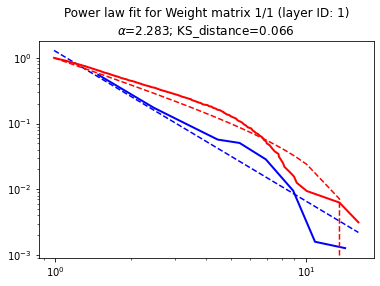

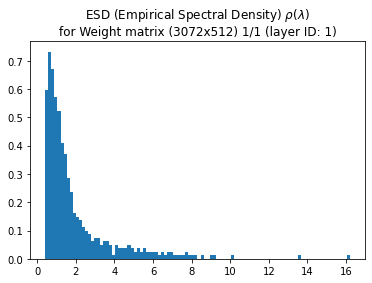

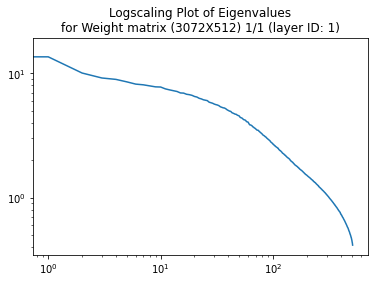

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


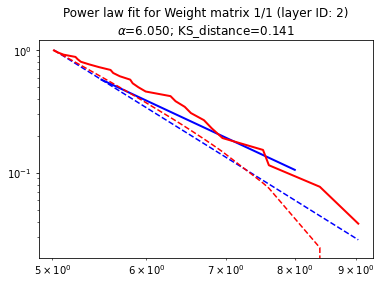

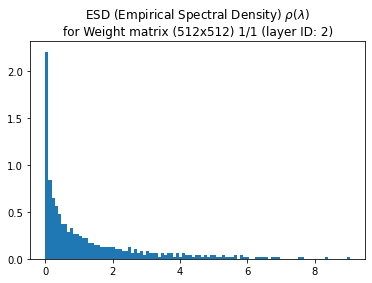

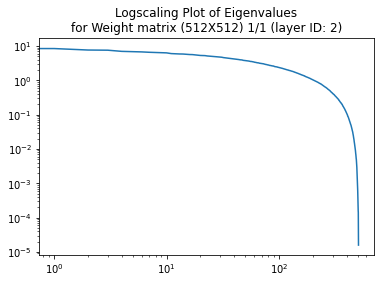

/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


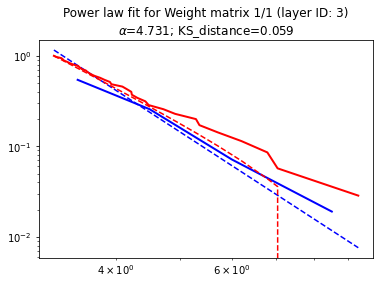

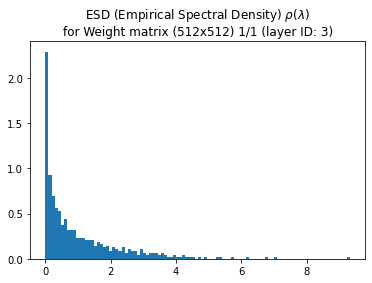

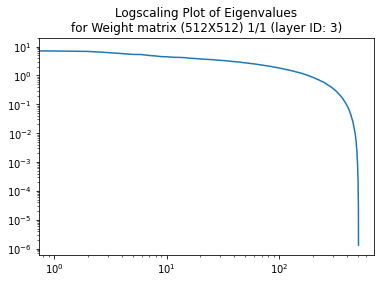

2020-04-14 18:34:05,115 INFO ### Printing results ###
2020-04-14 18:34:05,343 INFO Check: min: 0.03544544839596442, max: 0.16706160896346667, avg: 0.08432793643837519
2020-04-14 18:34:05,345 INFO Check compound: min: 0.03544544839596442, max: 0.16706160896346667, avg: 0.08432793643837519
2020-04-14 18:34:05,345 INFO CheckTF: min: False, max: False, avg: 0.0
2020-04-14 18:34:05,349 INFO CheckTF compound: min: 0.0, max: 0.0, avg: 0.0
2020-04-14 18:34:05,351 INFO Norm: min: 22.835819244384766, max: 31.433378219604492, avg: 26.745962142944336
2020-04-14 18:34:05,353 INFO Norm compound: min: 22.835819244384766, max: 31.433378219604492, avg: 26.745962142944336
2020-04-14 18:34:05,355 INFO LogNorm: min: 1.358616590499878, max: 1.4973909854888916, avg: 1.4234857559204102
2020-04-14 18:34:05,357 INFO LogNorm compound: min: 1.358616590499878, max: 1.4973909854888916, avg: 1.4234857559204102
2020-04-14 18:34:05,359 INFO Norm X: min: 36.40726089477539, max: 61.32120132446289, avg: 48.4442176818847

{'alpha': 4.354411664849782,
 'alpha_compound': 4.354411664849782,
 'alpha_weighted': 4.377985445952772,
 'alpha_weighted_compound': 4.377985445952772,
 'check': 0.08432793643837519,
 'checkTF': 0.0,
 'checkTF_compound': 0.0,
 'check_compound': 0.08432793643837519,
 'lognorm': 1.4234858,
 'lognormX': 1.6754812,
 'lognormX_compound': 1.6754812,
 'lognorm_compound': 1.4234858,
 'logpnorm': 5.069456989815698,
 'logpnorm_compound': 5.069456989815698,
 'norm': 26.745962,
 'normX': 48.444218,
 'normX_compound': 48.444218,
 'norm_compound': 26.745962}

In [0]:
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
results = watcher.analyze(alphas=True, plot=True)

watcher.get_summary()

In [0]:
import math
import numpy as np
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt


def get_esd_plot(eigenvalues, weights, label):
    density, grids = density_generate(eigenvalues, weights)
    plt.semilogy(grids, density + 1.0e-7, label=label)
    plt.legend()
    #plt.plot(grids, density + 1.0e-7)
    plt.ylabel('Density (Log Scale)', fontsize=14, labelpad=10)
    plt.xlabel('Eigenvalue', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.axis([np.min(eigenvalues) - 1, np.max(eigenvalues) + 1, None, None])
    plt.axis([-5,20, None, None])
    plt.tight_layout()
    plt.show()

def compare_esd_plot(eigenvalues, weights, random_eigen, random_weight):
    density, grids = density_generate(eigenvalues, weights)
    random_density, random_grids = density_generate(random_eigen, random_weight)
    plt.clf()
    plt.semilogy(random_grids, random_density + 1.0e-7, label='random')
    plt.semilogy(grids, density + 1.0e-7, label='true')
    plt.legend()
    #plt.plot(grids, density + 1.0e-7)
    plt.ylabel('Density (Log Scale)', fontsize=14, labelpad=10)
    plt.xlabel('Eigenvlaue', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.axis([np.min(eigenvalues) - 1, np.max(eigenvalues) + 1, None, None])
    plt.axis([-1, 1, None, None])
    plt.tight_layout()
    plt.show()
    plt.savefig('example.pdf')


def density_generate(eigenvalues,
                     weights,
                     num_bins=10000,
                     sigma_squared=1e-5,
                     overhead=0.01):

    eigenvalues = np.array(eigenvalues)
    weights = np.array(weights)

    lambda_max = np.mean(np.max(eigenvalues, axis=1), axis=0) + overhead
    lambda_min = np.mean(np.min(eigenvalues, axis=1), axis=0) - overhead

    grids = np.linspace(lambda_min, lambda_max, num=num_bins)
    sigma = sigma_squared * max(1, (lambda_max - lambda_min))

    num_runs = eigenvalues.shape[0]
    density_output = np.zeros((num_runs, num_bins))

    for i in range(num_runs):
        for j in range(num_bins):
            x = grids[j]
            tmp_result = gaussian(eigenvalues[i, :], x, sigma)
            density_output[i, j] = np.sum(tmp_result * weights[i, :])
    density = np.mean(density_output, axis=0)
    normalization = np.sum(density) * (grids[1] - grids[0])
    density = density / normalization
    return density, grids


def gaussian(x, x0, sigma_squared):
    return np.exp(-(x0 - x)**2 /
                  (2.0 * sigma_squared)) / np.sqrt(2 * np.pi * sigma_squared)

In [0]:
from __future__ import print_function

import json
import os
import sys

import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from hessian import *

import math
import copy

# Settings

# set random seed to reproduce the work
torch.manual_seed(0)


# get dataset
train_loader, test_loader = get_data(train_bs=100, test_bs=1)
##############
# Get the hessian data
##############
batch_num = -1.

if batch_num == 1:
    for inputs, labels in train_loader:
        hessian_dataloader = (inputs, labels)
        break
else:
    hessian_dataloader = []
    for i, (inputs, labels) in enumerate(train_loader):
        hessian_dataloader.append((inputs, labels))
        if i == batch_num - 1:
            break

criterion = nn.CrossEntropyLoss()  # label loss

###################
# Get model checkpoint, get saving folder
###################

trace_list = []
eigen_list = []


model = model.to('cuda:0')
model.eval()
if batch_num == 1:
  hessian_comp = hessian(model,
                           criterion,
                           data=hessian_dataloader,
                           cuda=True)
else:
  hessian_comp = hessian(model,
                           criterion,
                           dataloader=hessian_dataloader,
                           cuda=True)

print(
    '********** finish data loading and begin Hessian computation **********')

top_eigenvalues, _ = hessian_comp.eigenvalues()
trace = hessian_comp.trace()
density_eigen, density_weight = hessian_comp.density(iter=100)

trace_list.append(trace)
eigen_list.append((density_eigen, density_weight))


print('\n***Top Eigenvalues: ', top_eigenvalues)
print('\n***Trace: ', np.mean(trace))


Files already downloaded and verified
Files already downloaded and verified
********** finish data loading and begin Hessian computation **********

***Top Eigenvalues:  [1.2637176513671875]

***Trace:  171.98228327433267


In [0]:
np.save("MLP_3x512_truelabels_eigens", density_eigen)
np.save("MLP_3x512_truelabels_weights", density_weight)

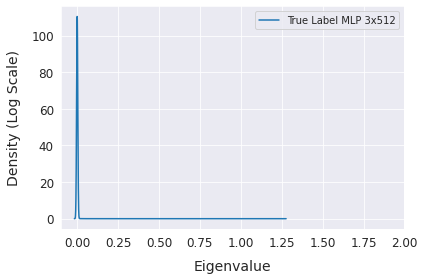

In [0]:
import seaborn as sns
sns.set_style("darkgrid")

density, grids = density_generate(density_eigen, density_weight)
plt.plot(grids, density + 1.0e-7, label="True Label MLP 3x512")
plt.legend()
plt.ylabel('Density (Log Scale)', fontsize=14, labelpad=10)
plt.xlabel('Eigenvalue', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axis([np.min(density_eigen) - 1, np.max(density_eigen) + 1, None, None])
plt.axis([-0.1,2, None, None])
plt.tight_layout()